In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [151]:
df = pd.read_csv(r'/home/fedora/Downloads/archive/corona_age_and_gender.csv')

In [152]:
df

,first_week_day,last_week_day,age_group,gender,weekly_tests_num,weekly_cases,weekly_deceased
0,15/03/2020,21/03/2020,0-19,Men,1115,44,0
1,15/03/2020,21/03/2020,0-19,Not Binary,0,0,0
2,15/03/2020,21/03/2020,0-19,Women,1065,39,0
3,15/03/2020,21/03/2020,20-24,Men,613,92,0
4,15/03/2020,21/03/2020,20-24,Not Binary,0,0,0
...,...,...,...,...,...,...,...
3754,24/10/2021,30/10/2021,80+,Not Binary,203,0,0
3755,24/10/2021,30/10/2021,80+,Women,8763,22,0
3756,24/10/2021,30/10/2021,NaN,Men,2186,23,0
3757,24/10/2021,30/10/2021,NaN,Not Binary,1147,0,0


In [153]:
for i in range(len(df['first_week_day'])):
    df['first_week_day'][i]=pd.to_datetime(df['first_week_day'][i]).value
    df['last_week_day'][i]=pd.to_datetime(df['last_week_day'][i]).value

<ipython-input-153-8057f8a83036>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_week_day'][i]=pd.to_datetime(df['first_week_day'][i]).value
<ipython-input-153-8057f8a83036>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_week_day'][i]=pd.to_datetime(df['last_week_day'][i]).value


In [154]:
df.dropna(inplace=True)

In [155]:
df.isna().sum()

first_week_day      0
last_week_day       0
age_group           0
gender              0
weekly_tests_num    0
weekly_cases        0
weekly_deceased     0
dtype: int64

In [156]:
df['age_group'].unique()

array(['0-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'],
      dtype=object)

In [157]:
df['age_group'] = df['age_group'].map({'0-19':0, '20-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6,
       '50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11, '75-79':12, '80+':13})
df['gender'] = df['gender'].map({'Men':0,'Women':1,'Not Binary':2})

In [158]:
df

,first_week_day,last_week_day,age_group,gender,weekly_tests_num,weekly_cases,weekly_deceased
0,1584230400000000000,1584748800000000000,0,0,1115,44,0
1,1584230400000000000,1584748800000000000,0,2,0,0,0
2,1584230400000000000,1584748800000000000,0,1,1065,39,0
3,1584230400000000000,1584748800000000000,1,0,613,92,0
4,1584230400000000000,1584748800000000000,1,2,0,0,0
...,...,...,...,...,...,...,...
3751,1635033600000000000,1635552000000000000,12,2,230,0,0
3752,1635033600000000000,1635552000000000000,12,1,4105,0,0
3753,1635033600000000000,1635552000000000000,13,0,4228,0,0
3754,1635033600000000000,1635552000000000000,13,2,203,0,0


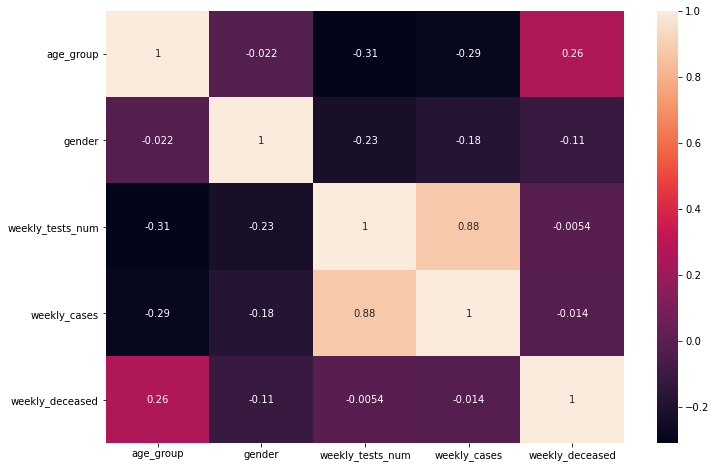

In [159]:
fig = plt.figure()
axes = fig.add_axes([0,0,1.5,1.5])
sns.heatmap(df.corr(),annot=True)

In [160]:
x = df.drop('weekly_deceased', axis=1)
y = df.weekly_deceased

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [163]:
rnd = RandomForestRegressor(n_jobs=-1)
rnd.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [164]:
rnd.predict(x_test)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  5.35,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.36,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  3.3 ,  0.  ,  0.  ,  1.5 ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
       10.02,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 15.69,
        2.76,  0.  ,  5.26,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.88,  0.  ,  1.26,  0.  , 14.54,  0.  ,  9.7 ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.92,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 19.86,  7.4 ,
        0.  , 27.91,

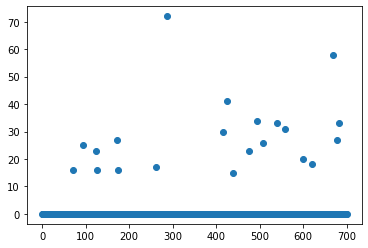

In [169]:
plt.scatter(range(len(x_test)),y_test)

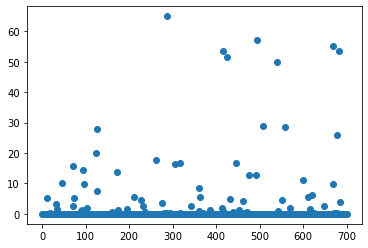

In [170]:
plt.scatter(range(len(x_test)),rnd.predict(x_test))

In [149]:
linreg.predict(x_test)

array([ 1.71077045,  1.5867931 ,  1.54706969,  1.71030528,  1.48788881,
        1.47409855,  1.33261089,  1.41084989,  1.4153982 ,  1.46296204,
        1.50779028,  1.07642877,  1.62965425,  1.67785617,  1.3252255 ,
        1.67536951,  1.45331494,  1.42819288,  1.89434675,  1.27563821,
        1.44036562,  1.27737906,  1.15827864,  1.99779293,  1.5508263 ,
        1.28118625,  1.14469743,  1.36602102,  1.47484321,  1.27920739,
        1.1071139 ,  1.45403951,  1.1641035 ,  1.20479546,  1.46189905,
        1.87887493,  1.87299404,  1.38678046,  1.51162103,  1.72855458,
        1.36847164,  1.1445047 ,  1.47671317,  1.18818442,  1.52432876,
        1.25726828,  1.33596612,  1.50121917,  1.51444874,  1.55433528,
        1.31909538,  1.16214609,  1.4900808 ,  1.58236688,  1.38010314,
        1.11274399,  1.14084635,  1.34300224,  1.72537953,  1.39279456,
        1.37259876,  1.67649623,  1.28496728,  1.32343355,  1.56527474,
        1.70097731,  1.48926449,  1.50109388,  1.62362396,  1.45